# Dawnside!

In [35]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
hfi = erk.get_hfi_returns()
hfi = hfi['2009':'2018']
hfi


D:\Project Pro Pycharm\P0\15-DS\edhec_risk_kit.py:39: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv("Data/edhec-hedgefundindices.csv", header=0, index_col=0, parse_dates=True)


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2009-01,0.0491,-0.0016,0.0082,-0.0112,0.0079,0.0132,0.0112,0.0029,-0.0017,0.0056,0.0100,0.0282,0.0060
2009-02,0.0164,-0.0031,-0.0122,-0.0133,-0.0046,-0.0091,0.0065,-0.0055,-0.0161,0.0006,-0.0016,0.0328,-0.0037
2009-03,0.0235,-0.0180,0.0022,0.0350,0.0021,0.0117,0.0057,0.0048,0.0188,0.0125,0.0100,-0.0462,0.0008
2009-04,0.0500,-0.0140,0.0387,0.0663,-0.0012,0.0337,0.0221,0.0127,0.0375,0.0081,0.0342,-0.0820,0.0092
2009-05,0.0578,0.0213,0.0504,0.0884,0.0146,0.0442,0.0365,0.0348,0.0516,0.0107,0.0392,0.0008,0.0312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022


### Semidiviation

In [41]:
hfi.std(ddof=0)

Convertible Arbitrage     0.013635
CTA Global                0.019759
Distressed Securities     0.015725
Emerging Markets          0.023461
Equity Market Neutral     0.006164
Event Driven              0.014651
Fixed Income Arbitrage    0.007617
Global Macro              0.010337
Long/Short Equity         0.016837
Merger Arbitrage          0.006441
Relative Value            0.009470
Short Selling             0.034161
Funds Of Funds            0.010691
dtype: float64

In [42]:
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.006681
CTA Global                0.010996
Distressed Securities     0.009498
Emerging Markets          0.015276
Equity Market Neutral     0.005186
Event Driven              0.010135
Fixed Income Arbitrage    0.003321
Global Macro              0.005075
Long/Short Equity         0.012139
Merger Arbitrage          0.003611
Relative Value            0.005711
Short Selling             0.021240
Funds Of Funds            0.007948
dtype: float64

In [56]:
aa = erk.semideviation(hfi)
print(aa.idxmin())

Fixed Income Arbitrage


### VaR and CVaR
value at risk

- Hisoric VaR
- Parametric VaR -- Gaussian
- Modified Cornish-Fisher VaR

In [9]:
np.percentile(hfi, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [18]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [19]:
from scipy.stats import norm

In [27]:
norm.ppf(0.5)

0.0

In [30]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [31]:
erk.var_gaussian(hfi, modified=True)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

<Axes: title={'center': 'EDHEC Hedge Fund Indices: VaR'}>

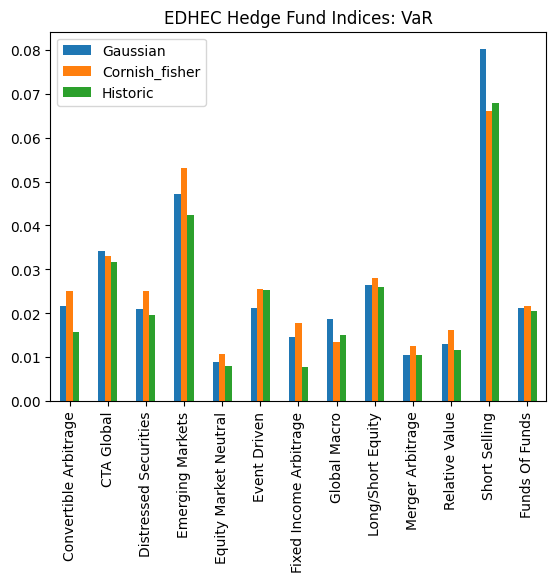

In [33]:
var_list = [erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified=True), erk.var_historic(hfi)]
comparison = pd.concat(var_list, axis=1)
comparison.columns = ["Gaussian", "Cornish_fisher", "Historic"]
comparison.plot.bar(title="EDHEC Hedge Fund Indices: VaR")

### CVaR

In [34]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64